# Network Science Tools 


## Libraries which we will go through with python

1. Networkx
2. matplotlib


### Prerequisite installations

Steps to install python on windows

- https://www.python.org/downloads/ 
- If pip is not installed https://www.liquidweb.com/kb/install-pip-windows/

1. python3, pip3, matplotlib
2. pip install networkx
3. pip install matplotlib

### Networkx

In [224]:
import networkx as nx
import matplotlib.pyplot as plt

### Creating a graph

1. create a graph object
2. add nodes
3. add edges
4. perform graph operations or even can plot to visualize

Simpleeee


In [160]:
G = nx.Graph()

In [4]:
G.add_node(1)

G.add_nodes_from(range(2,5))

In [5]:
G.add_edge(2,3)

In [7]:
edgeList = [(1,2), (1,4), (2,4), (3,4)]

In [8]:
G.add_edges_from(edgeList)

In [9]:
G.edges

EdgeView([(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)])

In [10]:
G.number_of_edges()

5

In [11]:
G.number_of_nodes()

4

In [12]:
G.degree[4]

3

/Users/sudhigopal/Library/Python/3.7/lib/python/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


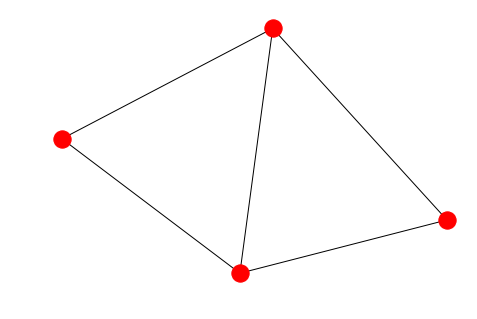

In [13]:
nx.draw(G)


### Lets read it from edge list, which is where we read our graph data 

In [14]:
edgeList = nx.read_edgelist("bfs.txt")

In [15]:
edgeList.number_of_edges()

24

In [16]:
edgeList.number_of_nodes()

15

/Users/sudhigopal/Library/Python/3.7/lib/python/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


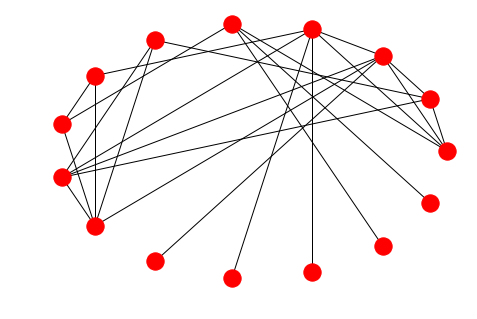

In [18]:
nx.draw_circular(edgeList)

In [19]:
karateClub = nx.read_edgelist("soc-karate.txt")
layout = nx.spring_layout

In [20]:
from math import log10

In [21]:
nodes = karateClub.number_of_nodes()

#### p value at which giant component (of size log(n) nodes) is expected

In [22]:
p_giant = 1.0/(nodes-1) 

#### p value at which graph is expected to become completely connected

In [76]:
p_vals = [0.02, 0.03, 0.045, 0.055]

In [81]:
def plot_connected(p_vals, nodes):
    
    region=220 # for pylab 2x2 subplot layout
    plt.subplots_adjust(left=0,right=1,bottom=0,top=0.95,wspace=0.01,hspace=0.01)
    plt.figure(figsize=(20,15))

    for p in p_vals:
        G = nx.binomial_graph(nodes, p)
        pos = layout(G)
        region += 1
        plt.subplot(region)
        plt.title("p = %6.3f" % (p))
        nx.draw(G, pos, node_size=10)

    #     identify the large componenet
        Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
        G0 = Gcc[0]

        nx.draw_networkx_edges(G0, pos, edge_color='r', width=6.0)

    #     Show other conencted Compoenents
        for Gi in Gcc[1:]:
            if len(Gi) > 1:
                nx.draw_networkx_edges(Gi, pos,
                                       with_labels=False,
                                       edge_color='r',
                                       alpha=0.3,
                                       width=5.0
                                      )
    #      show the plots
#         plt.show()

<Figure size 432x288 with 0 Axes>

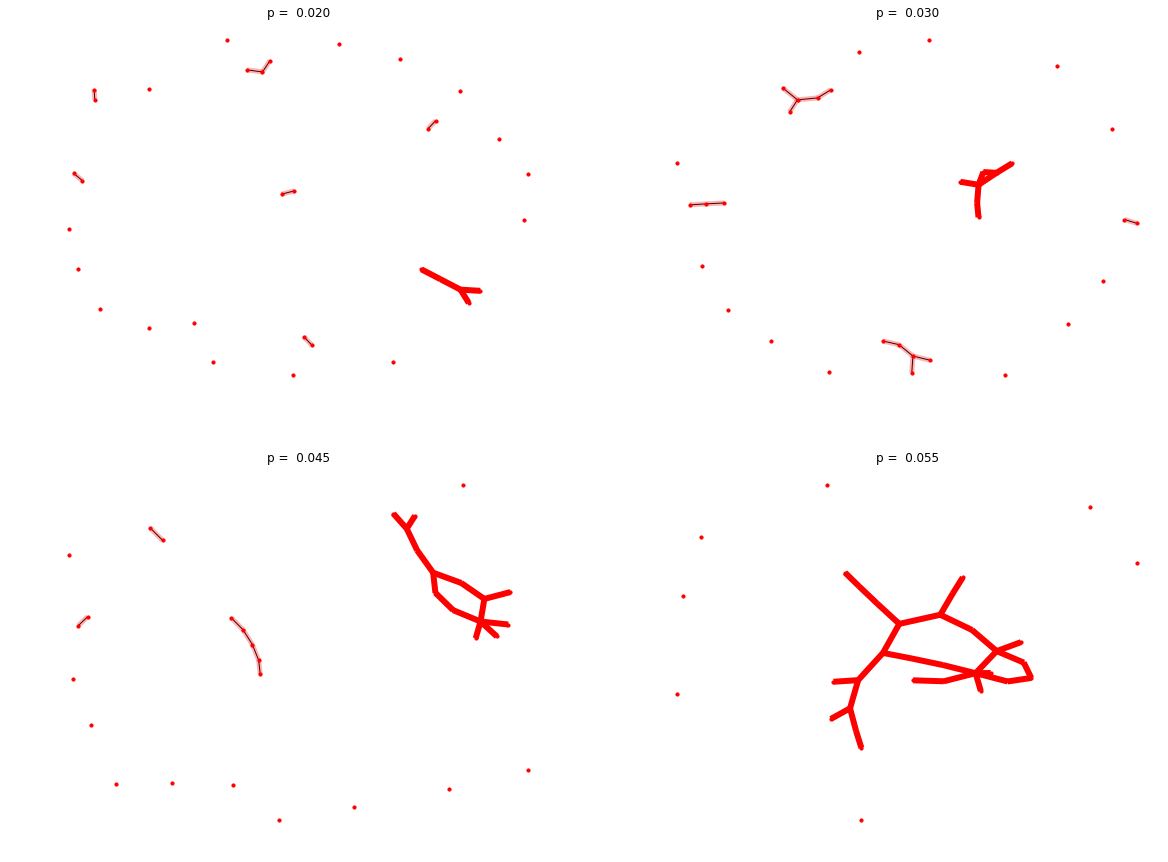

In [82]:
plot_connected(p_vals, nodes)

#### Algorithms on all these graphs

In [93]:
import networkx.algorithms as nxalg
import networkx.algorithms.approximation as nxapp

In [94]:
dolphinGraph = nx.read_edgelist("soc_dolphins.txt")

**Cliques**


In [113]:
list(nxalg.find_cliques(dolphinGraph))

[['26', '27', '1'],
 ['26', '27', '25'],
 ['2', '61'],
 ['2', '10', '42'],
 ['2', '44'],
 ['36', '1'],
 ['36', '23'],
 ['36', '20'],
 ['36', '39'],
 ['36', '37', '40'],
 ['36', '59'],
 ['51', '45', '29', '18', '24'],
 ['51', '45', '29', '18', '21'],
 ['51', '45', '50'],
 ['51', '45', '23'],
 ['51', '11'],
 ['51', '55'],
 ['51', '4'],
 ['46', '43'],
 ['46', '49'],
 ['21', '45', '37'],
 ['21', '33', '37'],
 ['48', '57'],
 ['20', '16', '50'],
 ['20', '16', '38'],
 ['20', '44', '38'],
 ['20', '8', '28'],
 ['20', '28', '47'],
 ['20', '18'],
 ['25', '17', '27'],
 ['9', '13', '32'],
 ['9', '13', '57', '17', '6'],
 ['9', '13', '57', '5'],
 ['9', '13', '57', '41'],
 ['19', '30', '7'],
 ['19', '54', '1'],
 ['19', '54', '7'],
 ['56', '5'],
 ['56', '6'],
 ['7', '27'],
 ['7', '40'],
 ['42', '50'],
 ['42', '47', '10', '0'],
 ['42', '47', '30'],
 ['18', '45', '15', '24'],
 ['13', '54', '57', '6'],
 ['13', '54', '57', '41'],
 ['14', '3'],
 ['14', '0', '40'],
 ['14', '33', '50', '16'],
 ['14', '33', '3

**Finding briges in graph**

In [99]:
bridges = nxalg.bridges(dolphinGraph)

In [101]:
list(bridges)

[('17', '22'),
 ('17', '31'),
 ('4', '51'),
 ('51', '11'),
 ('57', '48'),
 ('32', '60'),
 ('29', '35'),
 ('12', '33'),
 ('38', '58')]

In [102]:
nxalg.has_bridges(dolphinGraph)

True

Clustering

In [130]:
triangleDict = nxalg.triangles(dolphinGraph)

In [131]:
numtri = 0
for key, val in triangleDict.items():
    numtri += val

numtri /= 3

In [132]:
numtri

95.0

In [133]:
# transitivity: T = 3* numberofTri / Triads 

nxalg.transitivity(dolphinGraph)

0.3087757313109426

In [142]:
# Clustering coeff of nodes or a node

nxalg.clustering(dolphinGraph, '5')

0.5

In [143]:
# Average clustering
nxalg.average_clustering(dolphinGraph)

0.2589582460550202

**Vertex coloring**

In [150]:
nxalg.greedy_color(dolphinGraph, strategy='largest_first')

{'14': 0,
 '37': 1,
 '45': 0,
 '51': 1,
 '33': 2,
 '17': 0,
 '57': 1,
 '20': 0,
 '29': 2,
 '40': 3,
 '1': 1,
 '13': 2,
 '38': 1,
 '15': 1,
 '36': 2,
 '54': 0,
 '9': 3,
 '43': 3,
 '50': 3,
 '18': 3,
 '0': 2,
 '42': 0,
 '47': 1,
 '8': 2,
 '6': 4,
 '16': 4,
 '24': 4,
 '21': 4,
 '10': 3,
 '27': 2,
 '28': 3,
 '41': 4,
 '59': 3,
 '7': 1,
 '30': 2,
 '34': 3,
 '19': 3,
 '2': 1,
 '44': 2,
 '5': 0,
 '52': 4,
 '26': 0,
 '61': 0,
 '3': 1,
 '32': 0,
 '25': 1,
 '23': 3,
 '56': 1,
 '55': 0,
 '49': 0,
 '39': 0,
 '46': 1,
 '53': 1,
 '4': 0,
 '11': 0,
 '12': 0,
 '22': 1,
 '31': 1,
 '35': 0,
 '60': 1,
 '58': 0,
 '48': 0}

In [182]:
G = nx.Graph()
G.add_nodes_from(range(0,4))
edges = [(0,1),(0,2),
        (1,3),(2,3)]
        

G.add_edges_from(edges)

nx.greedy_color(G, strategy="largest_first")

{0: 0, 1: 1, 2: 1, 3: 0}

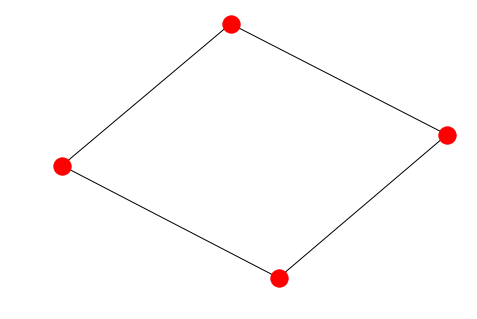

In [183]:
nx.draw(G)

**Communities**

In [ ]:
list(nxalg.community.label_propagation.label_propagation_communities(karateClub))

In [ ]:
list(nxalg.community.girvan_newman(karateClub))

Connectivity and Component Analysis

In [194]:
# check if the graph is connected / Strongly connected / weakly connected

isConn = nxalg.is_connected(dolphinGraph)
numComp = nxalg.number_connected_components(dolphinGraph)


In [196]:
print(isConn, numComp)

# we can check if the graph is strongly or weakly connected only on a Digraph

True 1


**Connectivity**

In [220]:
nxalg.edge_connectivity(dolphinGraph)

1

In [222]:
list(nxalg.k_edge_components(dolphinGraph, k =2
))

[{'0',
  '1',
  '10',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '32',
  '33',
  '34',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '49',
  '5',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '59',
  '6',
  '61',
  '7',
  '8',
  '9'},
 {'4'},
 {'11'},
 {'12'},
 {'22'},
 {'31'},
 {'35'},
 {'60'},
 {'58'},
 {'48'}]

In [223]:
nxalg.node_connectivity(dolphinGraph)

1

In [207]:
list(nxalg.k_components(dolphinGraph))

[4, 3, 2, 1]

In [234]:
hp = nx.generators.hypercube_graph(2)

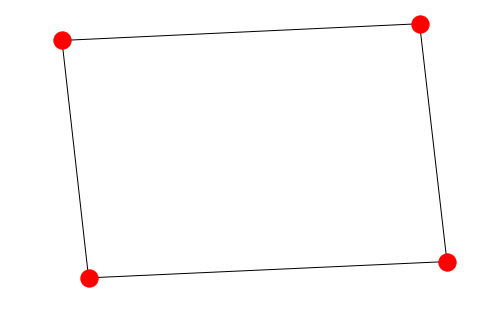

In [235]:
nx.draw(hp)

In [238]:
nxalg.could_be_isomorphic(G, dolphinGraph)

False

**Similarity**

In [240]:
# edit distance between two graphs

k4 = nx.complete_graph(4)

In [241]:
nxalg.graph_edit_distance(G, k4)

2.0

In [243]:
nxalg.graph_edit_distance(G, dolphinGraph)

213.0

### Random graphs

In [250]:
# erdos renyi model

erdos = nx.generators.erdos_renyi_graph(1000, 0.001)

In [251]:
nx.write_gml(erdos, 'erdos.gml')

In [260]:
barbasi = nx.generators.barabasi_albert_graph(1000, 2)

In [263]:
nx.write_graphml(barbasi, 'barbasi.graphml')

In [286]:
import random

In [281]:
degSeq = []
for i in range(0,1500):
    num = (random.randint(1,10))
    if num%2 == 0:
        degSeq.append(num)

In [282]:
len(degSeq)

764

In [283]:
conModel = nx.generators.configuration_model(degSeq)

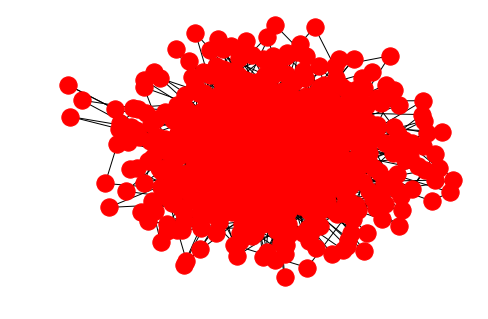

In [284]:
nx.draw(conModel)

In [285]:
nx.write_gml(conModel, 'conModel.gml')